# Энергия ферромагнетика 2D (2023)

### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1.0, 5.0)$ с шагом $0.1$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы. 

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым). 
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.
	
Средняя энергия системы 
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом: 
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 5.0)$:

- для $L_x=4$

```
 -1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889
```

- для $L_x=5$

```
 -1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [1]:
from functools import wraps
import time
from itertools import product
import numpy as np
from tqdm import tqdm
import math
from numba import njit, prange
import matplotlib.pyplot as plt
from typing import List

In [2]:
@njit
def matrix_energy( 
    matrix: np.ndarray, 
    lx: int, 
    ly: int
    ) -> int: 
    
    """
    Вычисляет энергию матрицы.

    Параметры:
        matrix (np.ndarray): Входная матрица.
        lx (int): Число столбцов матрицы.
        ly (int): Число строк матрицы.

    Возвращает:
        int: Вычисленная энергия матрицы.
    """
    energy = 0

    for y_idx in prange(ly):
        for x_idx in prange(lx):
            y_next = (y_idx + 1) % ly
            x_next = (x_idx + 1) % lx

            energy += 1 if matrix[y_idx][x_idx] == matrix[y_next][x_idx] else -1
            energy += 1 if matrix[y_idx][x_idx] == matrix[y_idx][x_next] else -1
    return -energy

In [3]:
def get_energies_by_shape(
        lx:int,
        ly:int
        ) -> List[int]:
                          
    """
    Генерирует энергии для всех возможных матриц заданного размера.

    Параметры:
        lx (int): Число строк в матрице.
        ly (int): Число столбцов в матрице.

    Возвращает:
        List[int]: Список вычисленных энергий для всех возможных матриц заданного размера.
    """
    
    energies = []
    rows = list(product([False, True], repeat=lx))
    for i in tqdm(rows):
        for j in rows:
            for k in rows:
                for l in rows[::2]:
                    m = [np.array(i), np.array(j), np.array(k), np.array(l)]
                    energies.append(matrix_energy(np.array(m), lx, ly))
    del rows
    return energies

In [4]:
@njit 
def calc_mean_energy_by_kt(
        energies: List[float], 
        kt: float
        )-> float:
    
    """
    Вычисляет среднюю энергию для заданных энергий и температуры.

    Параметры:
        energies (List[float]): Список энергий.
        kt (float): Температура.

    Возвращает:
        float: Среднюю энергию.
    """
    
    b = 1 / kt
    z = 0
    result = 0
    
    for e in energies:
        z += math.exp(-e * b)
    
    for e in energies:
        result  += e * math.exp(-e * b) / z
    
    return round(result, 8)

In [5]:
@njit(parallel=True)
def calc_mean_energy_all_kt(
        energies: List[float]
        ):
    
    """
    Вычисляет среднюю нормализованную энергию для заданных энергий и всего диапазона температур.

    Параметры:
    - energies (List[float]): Список значений энергии.

    Возвращает:
    - np.ndarray: Массив, содержащий средние нормализованные значения энергии
      для различных температур в заданном диапазоне.
    """
    
    values_mean_normalized = np.empty(40, dtype=np.float64)
    kt_values = np.arange(1.0, 5.0, 0.1)
    for i in prange(40):
        values_mean_normalized[i] = calc_mean_energy_by_kt(energies, kt_values[i])
    
    return values_mean_normalized

In [7]:
lx_kt = []
ly = 4
for lx in range(2, 9):
    start = time.time()
    energies = np.array(get_energies_by_shape(lx, ly), dtype=np.float64)
    print(f'Создание списка энергий для lx = {lx}:', end='   ')
    end = time.time()
    execution_time = end - start
    print('\033[92m' + f'{execution_time}' + '\033[0m')
    print(f'Создание списка энергий по kt:', end='   ')
    start_1 = time.time()
    mean_energy = calc_mean_energy_all_kt(energies) / (lx * ly)
    end_1 = time.time()
    execution_time_1 = end_1 - start_1
    print('\033[92m' + f'{execution_time_1}' + '\033[0m', end='\n\n')
    np.save('row_values_for_lx_'+str(lx), mean_energy)
    lx_kt.append(mean_energy)
norm_mean_energies_matrix = np.array(lx_kt)
np.save('matrix_values_of_mean', norm_mean_energies_matrix)

100%|██████████| 4/4 [00:00<00:00, 4016.57it/s]


Создание списка энергий для lx = 2:   0.002991199493408203
Создание списка энергий по kt:   0.0



100%|██████████| 8/8 [00:00<00:00, 729.14it/s]


Создание списка энергий для lx = 3:   0.013962745666503906
Создание списка энергий по kt:   0.0009970664978027344



100%|██████████| 16/16 [00:00<00:00, 114.96it/s]


Создание списка энергий для lx = 4:   0.14116740226745605
Создание списка энергий по kt:   0.002991199493408203



100%|██████████| 32/32 [00:01<00:00, 18.14it/s]


Создание списка энергий для lx = 5:   1.781303882598877
Создание списка энергий по kt:   0.030916213989257812



100%|██████████| 64/64 [00:29<00:00,  2.14it/s]


Создание списка энергий для lx = 6:   30.16429853439331
Создание списка энергий по kt:   0.4779787063598633



100%|██████████| 128/128 [08:05<00:00,  3.80s/it]


Создание списка энергий для lx = 7:   489.81752467155457
Создание списка энергий по kt:   7.269002676010132



100%|██████████| 256/256 [2:15:48<00:00, 31.83s/it]  


Создание списка энергий для lx = 8:   8215.614854097366
Создание списка энергий по kt:   117.13531136512756



In [8]:
norm_mean_energies_matrix = np.array(lx_kt)
np.save('norm_mean_energies_matrix', norm_mean_energies_matrix)

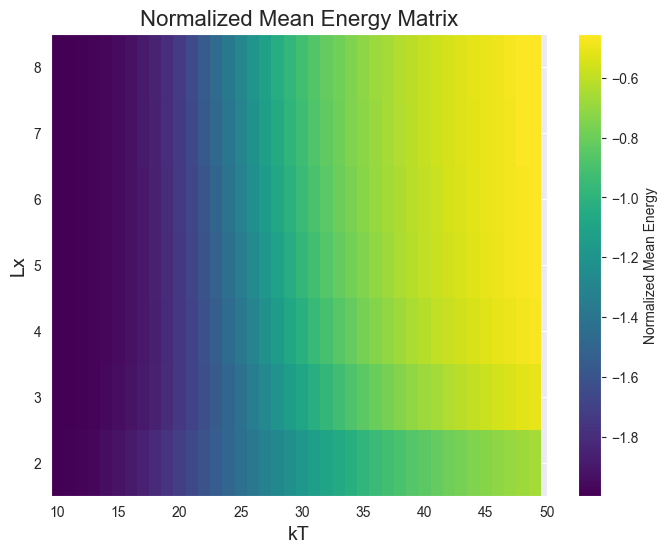

In [10]:
Data_for_matr_lx_tk = np.load('norm_mean_energies_matrix.npy')
plt.figure(figsize=(8, 6))
plt.title('Normalized Mean Energy Matrix', fontsize=16)
plt.pcolormesh(Data_for_matr_lx_tk, cmap='viridis', edgecolor='k', linewidth=0)
plt.colorbar(label='Normalized Mean Energy')
plt.xlabel('kT', fontsize=14)
plt.ylabel('Lx', fontsize=14)
lx_ticks = np.arange(2, 9)
tk_ticks = np.arange(10, 51, 5)
plt.xticks(np.linspace(0, Data_for_matr_lx_tk.shape[1], 9) + 0.5, tk_ticks)
plt.yticks(np.arange(Data_for_matr_lx_tk.shape[0]) + 0.5, lx_ticks)
plt.show()

In [11]:
print(lx_kt[0])

[-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.92742441 -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889]


In [12]:
print(lx_kt[1])

[-1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774]


In [13]:
print(lx_kt[2])

[-1.99715857 -1.99396113 -1.9885651  -1.98015781 -1.96780519 -1.95042956
 -1.92678909 -1.89549406 -1.8551112  -1.80440326 -1.74270304 -1.67032538
 -1.58882722 -1.50092868 -1.41005807 -1.31969261 -1.23276666 -1.15134108
 -1.07656139 -1.00881115 -0.94793988 -0.8934793  -0.84480933 -0.8012682
 -0.76221687 -0.72707144 -0.69531564 -0.66650184 -0.6402464  -0.61622247
 -0.59415234 -0.57380002 -0.55496464 -0.53747479 -0.52118369 -0.50596511
 -0.49171009 -0.47832415 -0.46572503 -0.45384075]


In [14]:
print(lx_kt[3])

[-1.9971582  -1.99395917 -1.98855691 -1.98012917 -1.96771861 -1.95019835
 -1.92623542 -1.89429394 -1.85274448 -1.80014859 -1.73572885 -1.65989967
 -1.57458935 -1.48308935 -1.38940408 -1.29738702 -1.21005576 -1.12930451
 -1.05597909 -0.99014354 -0.93137801 -0.87902058 -0.83233015 -0.79058107
 -0.75310988 -0.71933295 -0.68874798 -0.66092782 -0.63551132 -0.61219363
 -0.59071721 -0.57086391 -0.55244826 -0.53531194 -0.51931914 -0.50435283
 -0.49031168 -0.47710754 -0.46466335 -0.45291152]


In [17]:
print(lx_kt[4])

[-1.99715857 -1.99396113 -1.9885651  -1.98015781 -1.96780519 -1.95042956
 -1.92678909 -1.89549406 -1.8551112  -1.80440326 -1.74270304 -1.67032538
 -1.58882722 -1.50092868 -1.41005807 -1.31969261 -1.23276666 -1.15134108
 -1.07656139 -1.00881115 -0.94793988 -0.8934793  -0.84480933 -0.8012682
 -0.76221687 -0.72707144 -0.69531564 -0.66650184 -0.6402464  -0.61622247
 -0.59415234 -0.57380002 -0.55496464 -0.53747479 -0.52118369 -0.50596511
 -0.49171009 -0.47832415 -0.46572503 -0.45384075]


In [18]:
print(lx_kt[5])

[-1.9971582  -1.99395917 -1.98855691 -1.98012917 -1.96771861 -1.95019835
 -1.92623542 -1.89429394 -1.85274448 -1.80014859 -1.73572885 -1.65989967
 -1.57458935 -1.48308935 -1.38940408 -1.29738702 -1.21005576 -1.12930451
 -1.05597909 -0.99014354 -0.93137801 -0.87902058 -0.83233015 -0.79058107
 -0.75310988 -0.71933295 -0.68874798 -0.66092782 -0.63551132 -0.61219363
 -0.59071721 -0.57086391 -0.55244826 -0.53531194 -0.51931914 -0.50435283
 -0.49031168 -0.47710754 -0.46466335 -0.45291152]


In [19]:
print(lx_kt[6])

[-1.99715782 -1.99395721 -1.98854869 -1.98010037 -1.96763139 -1.94996517
 -1.9256775  -1.89308835 -1.85038376 -1.79595524 -1.72897966 -1.65006493
 -1.56159886 -1.46746088 -1.3721347  -1.2796628  -1.19294766 -1.11358151
 -1.04206613 -0.97817674 -0.92129527 -0.87064768 -0.82544473 -0.78495363
 -0.74852625 -0.7156046  -0.68571477 -0.65845691 -0.63349415 -0.61054232
 -0.58936109 -0.56974634 -0.55152389 -0.53454443 -0.51867942 -0.50381755
 -0.48986205 -0.47672838 -0.46434245 -0.45263888]
